
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
my_cols = pd.read_csv('./data/pokemon/columns.csv').column.values.tolist()

df = pd.read_csv('./data/pokemon/pokemon.csv',
                       delimiter=',',
                       header=0,                       
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [3]:
print("Estructura features del dataset: {}".format(df.shape))

Estructura features del dataset: (801, 41)


In [4]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [22]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Se be que la columna abilities podrías epararse en más columnas para disiminuir las clases de esa columna

In [26]:
df['abilities'].value_counts()

['Levitate']                                 29
['Beast Boost']                               7
['Shed Skin']                                 5
['Clear Body', 'Light Metal']                 4
['Poison Point', 'Rivalry', 'Hustle']         4
                                             ..
['Hyper Cutter', 'Sand Veil', 'Immunity']     1
['Pressure', 'Infiltrator']                   1
['Insomnia', 'Super Luck', 'Moxie']           1
['Guts', 'Quick Feet', 'Unnerve']             1
['Flower Gift']                               1
Name: abilities, Length: 482, dtype: int64
['Overgrow', 'Chlorophyll']


In [76]:

s = df['abilities']
s = s.str.replace("'", "")
s = s.str.replace("[", "")
s = s.str.replace("]", "")
s.str.strip(',')




<ipython-input-76-8a69992800c6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  s = s.str.replace("[", "")
<ipython-input-76-8a69992800c6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  s = s.str.replace("]", "")


0      Overgrow, Chlorophyll
1      Overgrow, Chlorophyll
2      Overgrow, Chlorophyll
3         Blaze, Solar Power
4         Blaze, Solar Power
               ...          
796              Beast Boost
797              Beast Boost
798              Beast Boost
799              Prism Armor
800               Soul-Heart
Name: abilities, Length: 801, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [7]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

## Preprocessing

In [8]:
df.describe(include='O')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Voltolos (keshin Forme)ボルトロス,Bunnelby,water,flying
freq,29,250,8,1,1,114,95


In [9]:
# Se analiza la columna capture rate que es de tipo objeto pero tiene casi todos sus valores numéricos, menos uno. Se trata de transformar en una columna numérica
df.loc[pd.to_numeric(df['capture_rate'], errors='coerce').isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,...,NaN,774,100,60,120,rock,flying,40.0,7,0


In [10]:
#La columna capture_rate debería ser solo numérico. Se encuentra la fila 773 que es errónea.
# #Se deja como NaN el valor para esa columna para que completar después con el tratamiento de missing values y NaNs
df['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')
df.loc[773, 'capture_rate']

nan

In [11]:
# Rechequeo de tipos
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate         float64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

### Estandarización

In [12]:
# dejamos al Label cómo tipo distinto, pero numérico, para separar después por tipos
df = df.astype({'is_legendary': 'int32'})

In [13]:
# Se separa en columnas Numéricas y Object
# Notar que el Label (is_legendary) queda afuera de abmas por ser int32
# No queremos estandarizar categorías binarias
colsNumericas = df.select_dtypes(['float64', 'int64']).columns
colsObject = df.select_dtypes(['object']).columns

In [14]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[colsNumericas])

df2 = df.copy(deep=True)
df2[colsNumericas] = X_scaled



### Missing

In [15]:
#Identificar columnas con valores NaN
colsNa = pd.DataFrame(data=df.isna().sum()>0, columns=['Valor'])
mask = colsNa.loc[colsNa['Valor']].index
df[mask]

,capture_rate,height_m,percentage_male,type2,weight_kg
0,45.0,0.7,88.1,poison,6.9
1,45.0,1.0,88.1,poison,13.0
2,45.0,2.0,88.1,poison,100.0
3,45.0,0.6,88.1,NaN,8.5
4,45.0,1.1,88.1,NaN,19.0
...,...,...,...,...,...
796,25.0,9.2,NaN,flying,999.9
797,255.0,0.3,NaN,steel,0.1
798,15.0,5.5,NaN,dragon,888.0
799,3.0,2.4,NaN,NaN,230.0


In [16]:
# Completar valores NaN

valueNum=df2[colsNumericas].values
valueObj=df2[colsObject].values

impNum = SimpleImputer(missing_values=np.nan, strategy='mean')
impObject = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

transformed_valuesNum = impNum.fit_transform(valueNum)
transformed_valuesObj = impObject.fit_transform(valueObj)

df3 = df2.copy(deep=True)

df3[colsNumericas] = transformed_valuesNum
df3[colsObject] = transformed_valuesObj

print(df.isna().sum().sum())
print(df2.isna().sum().sum())
print(df3.isna().sum().sum())


523
523
0


In [17]:
df3.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,...,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,8.010000e+02,801.000000
mean,-1.774139e-16,-2.256483e-16,-5.100650e-17,9.445905e-17,1.181743e-15,-3.309185e-18,-2.361823e-16,2.566958e-16,-3.619486e-16,1.750576e-16,...,-8.953859e-17,-6.521347e-17,1.013298e-16,-6.653022e-18,-9.037021e-17,2.045804e-16,-1.976848e-17,5.998115e-17,6.381357e-16,0.087391
std,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,...,9.880536e-01,1.000625e+00,9.374167e-01,1.000625e+00,1.000625e+00,1.000625e+00,1.000625e+00,9.880536e-01,1.000625e+00,0.282583
min,-1.250270e+00,-1.843286e+00,-2.745712e+00,-1.640770e+00,-1.569399e+00,-1.486522e+00,-1.280632e+00,-1.560781e+00,-1.765558e+00,-9.944402e-01,...,-9.854192e-01,-2.558746e+00,-2.724117e+00,-1.729890e+00,-1.896041e+00,-1.823143e+00,-2.123067e+00,-5.607197e-01,-1.394551e+00,0.000000
25%,-8.314219e-01,-1.304414e-01,8.845721e-02,-8.768890e-01,-1.321788e-01,-7.889798e-01,-9.190580e-01,-3.192858e-01,2.685259e-02,-6.773436e-01,...,-5.222994e-01,-7.138259e-01,-2.546406e-01,-8.649449e-01,-8.135762e-01,-7.488387e-01,-7.384863e-01,-4.765360e-01,-8.762049e-01,0.000000
50%,6.274882e-03,-1.304414e-01,8.845721e-02,-1.130085e-01,-1.321788e-01,-9.143806e-02,-1.959092e-01,-3.192858e-01,2.685259e-02,-4.315047e-02,...,-1.518037e-01,-1.490545e-01,-2.546406e-01,0.000000e+00,-1.950251e-01,-1.758765e-01,-4.619591e-02,-3.008481e-01,1.604866e-01,0.000000
75%,6.274882e-03,-1.304414e-01,8.845721e-02,-1.130085e-01,-1.321788e-01,-9.143806e-02,1.250388e+00,-3.192858e-01,2.685259e-02,-4.315047e-02,...,3.113161e-01,4.157169e-01,-9.096564e-17,8.649449e-01,6.090914e-01,6.835668e-01,6.460945e-01,1.115389e-03,6.788323e-01,0.000000
max,5.032456e+00,6.720938e+00,2.922626e+00,4.470274e+00,5.616701e+00,4.093813e+00,4.142984e+00,4.646694e+00,5.404084e+00,3.762008e+00,...,1.235243e+01,7.004716e+00,2.214836e+00,1.729890e+00,3.794630e+00,5.696986e+00,3.934474e+00,8.587859e+00,1.715524e+00,1.000000


In [18]:
df3.describe(include='O')

,abilities,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801
unique,482,588,801,801,18,18
top,['Levitate'],Dragon Pokémon,Voltolos (keshin Forme)ボルトロス,Bunnelby,water,flying
freq,29,8,1,1,114,479


In [19]:
df3.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",0.006275,-0.130441,0.088457,-0.876889,-1.090325,-0.788980,1.250388,1.336041,0.026853,...,1.6271,-1.729890,-0.195025,-0.211687,-0.738486,grass,poison,-0.498497,-1.394551,0
1,"['Overgrow', 'Chlorophyll']",0.006275,-0.130441,0.088457,-0.876889,-1.090325,-0.788980,1.250388,1.336041,0.026853,...,1.6271,-1.725565,0.268888,0.325465,-0.219268,grass,poison,-0.442679,-1.394551,0
2,"['Overgrow', 'Chlorophyll']",0.006275,-0.130441,0.088457,-0.876889,-1.090325,-0.788980,1.250388,1.336041,0.026853,...,1.6271,-1.721240,1.567846,1.757871,0.473022,grass,poison,0.353406,-1.394551,0
3,"['Blaze', 'Solar Power']",-0.831422,-0.130441,0.088457,-0.113009,-1.090325,-0.091438,-0.919058,-0.319286,0.026853,...,1.6271,-1.716916,-0.349663,-0.748839,-0.046196,fire,flying,-0.483856,-1.394551,0
4,"['Blaze', 'Solar Power']",-0.831422,-0.130441,0.088457,-0.113009,-1.090325,-0.091438,-0.919058,-0.319286,0.026853,...,1.6271,-1.712591,0.268888,-0.211687,0.473022,fire,flying,-0.387777,-1.394551,0


# Visualización


De las columnas No Numéricas, algunas no nos van a servir, como name, japanese_name por ser valores únicos. Abilities, si bien no son únicos, hay demasia

In [ ]:
df3['type2'].value_counts()

flying      479
poison       34
ground       34
fairy        29
psychic      29
fighting     25
steel        22
dark         21
grass        20
dragon       17
water        17
ice          15
ghost        14
rock         14
fire         13
electric      9
bug           5
normal        4
Name: type2, dtype: int64

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

## Definicion de los sets de test, train y validacion

In [ ]:
#split

from sklearn.model_selection import train_test_split

label = 'is_legendary'
df3[label] = df3[label] * 1
features = df3.loc[:, df3.columns != label].columns

# dejamos solo las numéricas
features = df3[colsNumericas].columns

X = df3[features]
y = df3[label]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_val, y_val, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=57)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(536, 34)
(265, 34)
(88, 34)
(536,)
(265,)
(88,)


## PCA


In [ ]:
pca = PCA(n_components=0.9, random_state=26).fit(X_train)
X_pca = pca.transform(X_train)

In [ ]:
X_pca.shape

(536, 19)

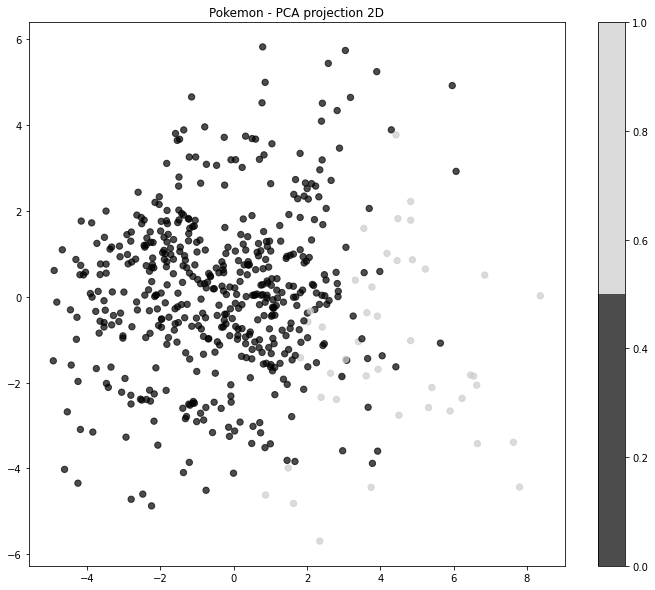

In [ ]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('Pokemon - PCA projection 2D');

## Logistic Regression

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [ ]:

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


LogisticRegression()

In [ ]:
predictions = logistic_regression.predict(X_test)
predictions2 = logistic_regression.predict(X_val)

Performance vs Test

In [ ]:
precision_score(y_test, predictions)

0.8571428571428571

In [ ]:
# 
confusion_matrix(y_test, predictions)

array([[235,   4],
       [  2,  24]], dtype=int64)

Performance vs validation

In [ ]:
precision_score(y_val, predictions2)

0.8461538461538461

In [ ]:
# 
confusion_matrix(y_val, predictions2)

array([[74,  2],
       [ 1, 11]], dtype=int64)

### La regresión Logística con los features seleccionados arroja muy buenos resultados tanto en el score como en la matriz de confusión

## Logistic Regression Cross Validation

In [ ]:
logistic_regressionCV = LogisticRegressionCV()
logistic_regressionCV.fit(X_train, y_train)

predictionsCV = logistic_regressionCV.predict(X_test)
predictionsCV2 = logistic_regressionCV.predict(X_val)

Performance vs Test

In [ ]:
precision_score(y_test, predictionsCV)

0.9230769230769231

In [ ]:
confusion_matrix(y_test, predictionsCV)

array([[237,   2],
       [  2,  24]], dtype=int64)

Performance vs validation

In [ ]:
precision_score(y_val, predictionsCV2)

0.9166666666666666

In [ ]:
confusion_matrix(y_val, predictionsCV2)

array([[75,  1],
       [ 1, 11]], dtype=int64)

### La Regresión Logística con Cross Validation es superior a la Regresión Logística común en cuanto a performance con los features seleccionados tanto en el score como en la matriz de confusión.